# Before class

* Thing 1 to do before class
* Thing 2 to do before class

# Outline of class agenda

1. Agenda item 1
2. Agenda item 2
3. Agenda item 3
 

# Using REST APIs

## What is REST?
- Useful way to talk to servers to send and receive data
- Servers have `endpoints` for the client to request specific resources (auth, blogs, etc)
- HTTP verbs like `GET` and `POST` are common types of request - GET a list of tweets, POST your credentials to login

Some useful notes here:
https://realpython.com/api-integration-in-python/#appendix-rest-in-a-nutshell
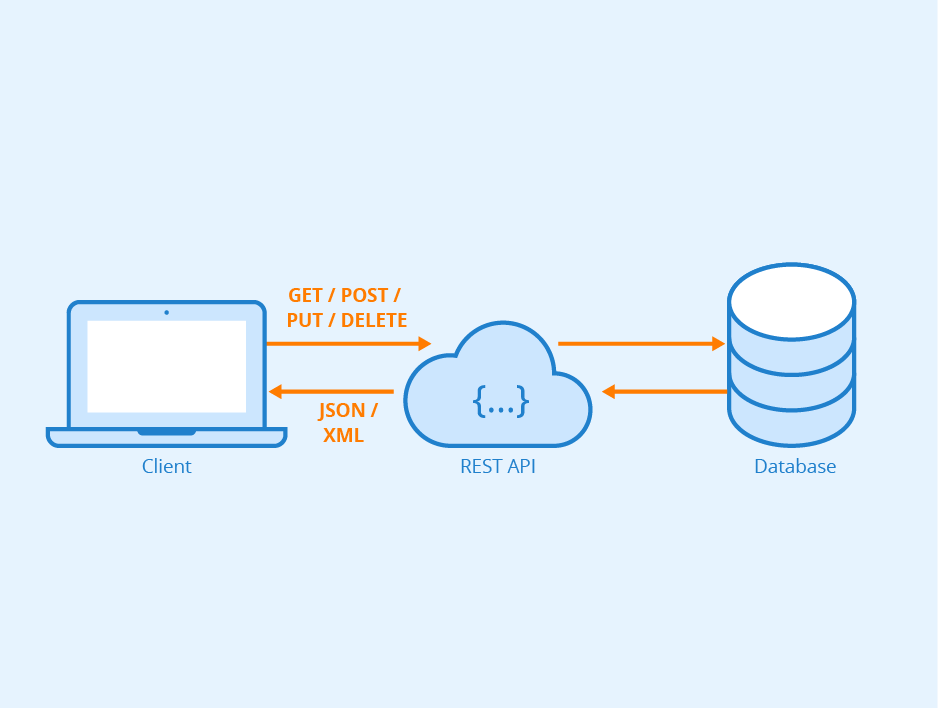

## HTTP 

HTTP is a protocol which allows the fetching of resources, such as HTML documents. It is the foundation of any data exchange on the Web and it is a client-server protocol, which means **requests are initiated by the recipient**, usually the Web browser. A complete document is reconstructed from the different sub-documents fetched, for instance text, layout description, images, videos, scripts, and more.

https://developer.mozilla.org/en-US/docs/Web/HTTP

## HTTP Request Methods or Verbs
https://developer.mozilla.org/en-US/docs/Web/HTTP/Methods

HTTP defines a set of request methods to indicate the desired action to be performed for a given resource. Although they can also be nouns, these request methods are sometimes referred to as HTTP verbs. A few popular ones:
- `GET`
- `POST`
- `PUT`
- `DELETE`



## URLs

The target of an HTTP request is called a "resource", whose nature isn't defined further; it can be a document, a photo, or anything else. Each resource is identified by a Uniform Resource Identifier (URI) used throughout HTTP for identifying resources.

The most common form of URI is the Uniform Resource Locator (URL), which is known as the web address.
- `https://developer.mozilla.org`
- `https://developer.mozilla.org/en-US/docs/Learn/`
- `https://developer.mozilla.org/en-US/search?q=URL`

## HTTP Response Status Codes

HTTP response status codes indicate whether a specific HTTP request has been successfully completed. Responses are grouped in five classes:

- `100–199` Informational responses,
- `200–299` Successful responses,
- `300–399` Redirects,
- `400–499` Client errors,
- `500–599` and Server errors

## JSON
https://realpython.com/lessons/what-is-json/

JavaScript Object Notation (JSON) represents objects as name/value pairs, just like a Python dictionary.

- It's a standardized format commonly used to **transfer data as text** that can be sent over a network. 
- It’s used by lots of APIs and Databases, and it’s easy for both humans and machines to read.

In [ ]:
{
    # string
    "token": "oneverylongstringand12345678910",
    # int or float
    "id": 1,
    # boolean
    "success": true,
    # list
    "roles": ["admin", "owner"]
    # dictionary
    "details": { "name": "Ash" }
}

When using APIs we will frequently receive JSON objects. But before they can be useful to us, we need to convert them into dictionaries to access it's key/value pairs in Python. Sometimes this is taken for us by an API package, sometimes we need to do the manual work ourselves. More on this soon.

## Making a simple GET request

In [ ]:
!pip install requests

In [ ]:
import requests

## Github Jobs
#### Find URL to jobs that have Python as a required skill in the descriptions

In [ ]:
response = requests.get('https://jobs.github.com/positions.json?page=1&search=code')

In [ ]:
jobs = response.json()

In [ ]:
shortlist = []
for job in jobs:
    if job['description'].find('Python') != -1:
        shortlist.append(job['url'])

print(shortlist)

## Challenge 1 - COVID Tracking Project
#### Find current hospitalizations for any state
https://covidtracking.com/data/api

In [ ]:
state = str(input('Choose a state: ')).lower()

In [ ]:
url = f'https://covidtracking.com/api/v1/states/{state}/current.json'

In [ ]:
response = requests.get(url)

In [ ]:
data = response.json()

In [ ]:
print(f"Hospitalized Currently: {data['hospitalizedCurrently']}")

# Making authorized requests

### News API
#### Find all articles related to police violence 
https://newsapi.org/docs/client-libraries/python

In [ ]:
!pip install newsapi-python

In [ ]:
import json

with open('news_api_key.txt') as file:
   api_key = file.read()

In [ ]:
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key)

In [ ]:
def get_article_titles(results):
    titles = []
    for article in results['articles']:
        titles.append(article['title'])
    return titles

news_results = newsapi.get_everything(q='amazon', language='en')
titles = get_article_titles(news_results)

print(titles)

## Challenge 2
#### Get Wired's top headlines about movies

In [ ]:
sources_results = newsapi.get_sources()

def get_wired_id(results):
    for source in results['sources']:
        if source['name'] == 'Wired':
            return source['id']
        
wired_id = get_wired_id(results)

headlines_results = newsapi.get_top_headlines(sources=wired_id, q="movies")

top_headlines = get_article_titles(headlines_results)

print(top_headlines)


### Spotify API
#### Search for an Artist 
https://spotipy.readthedocs.io/en/2.13.0/

In [ ]:
!pip install spotipy

In [ ]:
import json

with open('spotify_secrets.json') as file:
    secrets = json.load(file)

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

creds = SpotifyClientCredentials(secrets['client_id'], secrets['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=creds)

In [ ]:
def get_artist_id(results):
    return results['artists']['items'][0]['id']

artist_results = sp.search(q='Kendrick Lamar', type='artist')
artist_id = get_artist_id(results)

print(artist_id)

## Challenge 3
#### Get an Artist's Top Tracks

In [ ]:
def get_tracks(results):
    tracks = []
    for track in results['tracks']:
        tracks.append(track['name'])
    return tracks

tracks_results = sp.artist_top_tracks(artist_id, country="US")
tracks = get_tracks(tracks_results)

print(tracks)